In [1]:
import ast
import dis
import IPython
from graphviz import Digraph

In [2]:
def visit(node, nodes, pindex, g):
  name = str(type(node).__name__)
  index = len(nodes)
  nodes.append(index)
  g.node(str(index), name)
  if index != pindex:
    g.edge(str(pindex),str(index))
  for n in ast.iter_child_nodes(node):
    visit(n, nodes, index, g)

In [3]:
def show_ast(src):
  graph = Digraph(format="png")
  tree = ast.parse(src)
  visit(tree, [], 0, graph)
  img = graph.render("test.png")
  return IPython.display.Image(img)

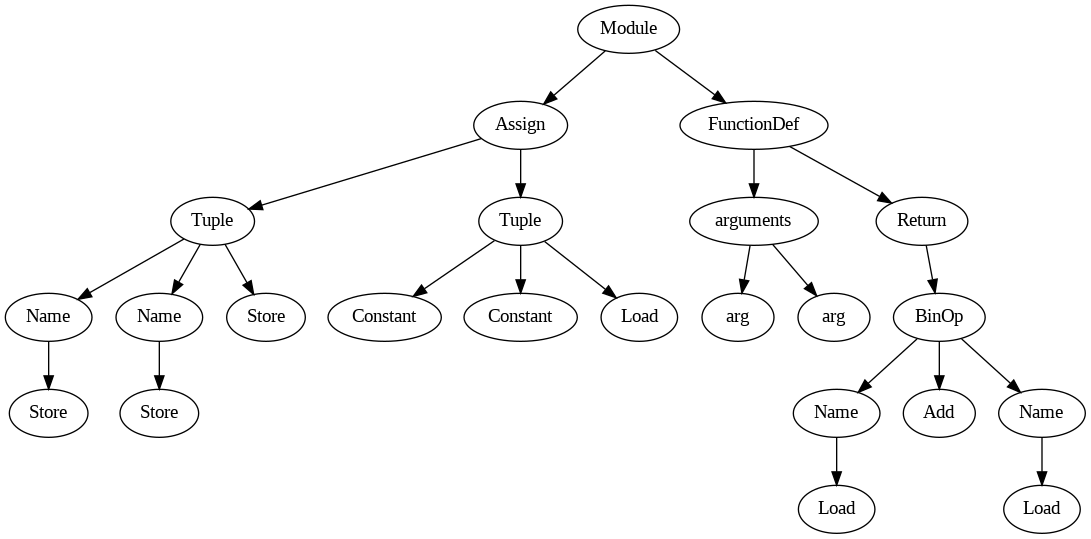

In [6]:
src = """
a, b = (1,2)
def func(a,b):
  return a+b
"""
show_ast(src)

In [9]:
dis.dis("a+b*c")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE
